In [1]:
# Import libraries
# Pandas is used for working with data frames
import pandas as pd
# Seaborn is used for line of best fit
import seaborn as sns
# Matplotlib is used for plotting
from matplotlib import pyplot as plt
# Sklearn is used to split data into train and test sets
from sklearn.model_selection import train_test_split
# This is used to scale the data
from sklearn.preprocessing import StandardScaler
# Used to change month name to month number
from time import strptime
# Used to run linear regression models
from sklearn.linear_model import LinearRegression
# Used to run decision tree models
from sklearn.tree import DecisionTreeRegressor
# Used to run random forest models
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
# Used to print model accuracy statistics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_val_score
# Used to run calculations
import numpy as np
# Meta-estimator to regress on a transformed target 
# Useful for applying a non-linear transformation to the target y in regression problems
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### Reading and Cleaning the Data

In [2]:
# Read the dodgers-2022 csv file and assign it to a dataframe variable
dodgers_df = pd.read_csv('dodgers-2022.csv')

In [3]:
# Check the top of the dataframe
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [4]:
# Check the unique values in the month column
dodgers_df.month.unique()

array(['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'], dtype=object)

In [5]:
# Create a dictionary assigning numbers to each month string
d = {'APR':4, 'MAY':5, 'APR':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10}
# Replace the strings with the numbers from the dictionary in the month column
dodgers_df.month = dodgers_df.month.map(d)

In [6]:
# Check the top of the dataframe
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,5,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,5,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,5,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,5,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,5,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


### Visualizations

array([[<Axes: title={'center': 'attend'}>]], dtype=object)

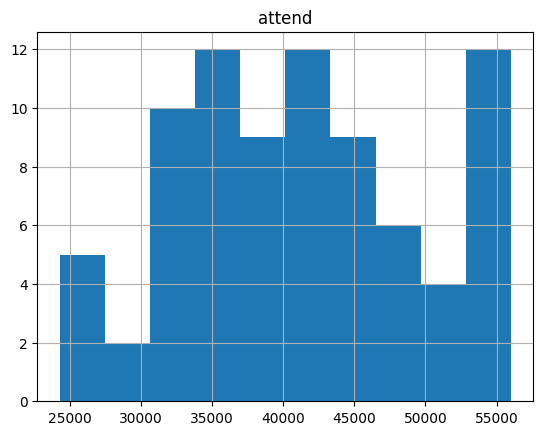

In [7]:
# Create a histogram for the attend column to see if the data is normalized
dodgers_df.hist(column = 'attend')

It appears that the data for attendance isn't quite normally distributed. This could be due to the small data sample - the fact that the information comes primarily from the warmer months of the year and also during the months where more people go on vacation probably influences this.

array([[<Axes: title={'center': 'temp'}>]], dtype=object)

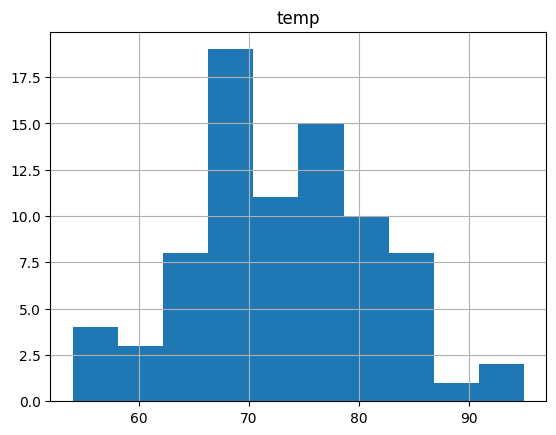

In [8]:
# Create a histogram for temperatures
dodgers_df.hist(column = 'temp')

In [9]:
# Import libraries
# Pandas is used for working with data frames
import pandas as pd
# Seaborn is used for line of best fit
import seaborn as sns
# Matplotlib is used for plotting
from matplotlib import pyplot as plt
# Sklearn is used to split data into train and test sets
from sklearn.model_selection import train_test_split
# This is used to scale the data
from sklearn.preprocessing import StandardScaler
# Used to change month name to month number
from time import strptime
# Used to run linear regression models
from sklearn.linear_model import LinearRegression
# Used to run decision tree models
from sklearn.tree import DecisionTreeRegressor
# Used to run random forest models
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
# Used to print model accuracy statistics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import cross_val_score
# Used to run calculations
import numpy as np
# Meta-estimator to regress on a transformed target 
# Useful for applying a non-linear transformation to the target y in regression problems
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

from sklearn.model_selection import GridSearchCV

### Reading and Cleaning the Data

In [10]:
# Read the dodgers-2022 csv file and assign it to a dataframe variable
dodgers_df = pd.read_csv('dodgers-2022.csv')

In [11]:
# Check the top of the dataframe
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [12]:
# Check the unique values in the month column
dodgers_df.month.unique()

array(['APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT'], dtype=object)

In [13]:
# Create a dictionary assigning numbers to each month string
d = {'APR':4, 'MAY':5, 'APR':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10}
# Replace the strings with the numbers from the dictionary in the month column
dodgers_df.month = dodgers_df.month.map(d)

In [14]:
# Check the top of the dataframe
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,5,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,5,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,5,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,5,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,5,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


### Visualizations

array([[<Axes: title={'center': 'attend'}>]], dtype=object)

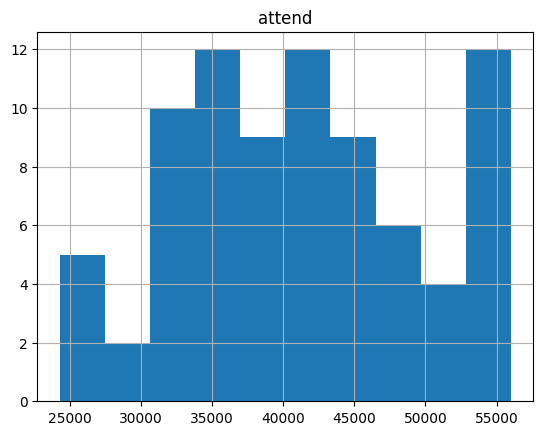

In [15]:
# Create a histogram for the attend column to see if the data is normalized
dodgers_df.hist(column = 'attend')

It appears that the data for attendance isn't quite normally distributed. This could be due to the small data sample - the fact that the information comes primarily from the warmer months of the year and also during the months where more people go on vacation probably influences this.

array([[<Axes: title={'center': 'temp'}>]], dtype=object)

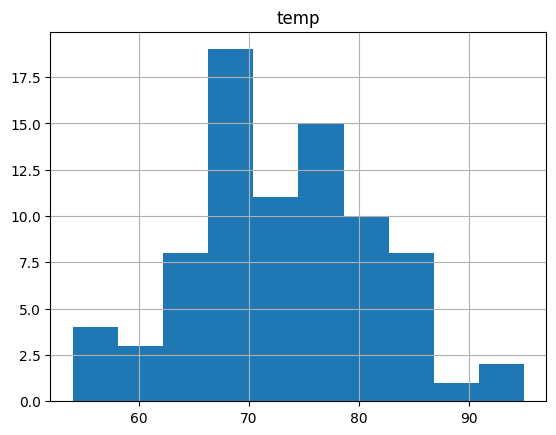

In [16]:
# Create a histogram for temperatures
dodgers_df.hist(column = 'temp')

The temperatures are roughly normally distributed. This makes sense due to the general pattern that temperatures exist on earth as it is today. It is notable that most of the temperatures are below 85. It may be shown later that extreme temperatures decrease attendance.

<Axes: xlabel='day_of_week'>

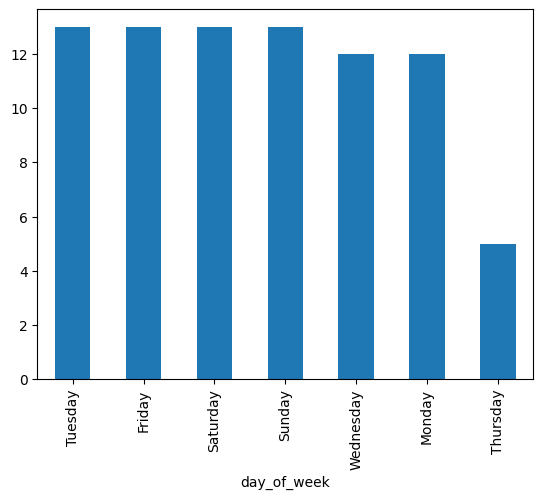

In [17]:
# Create a bar chart showing the number of entries for each day of the week
dodgers_df.day_of_week.value_counts().plot.bar()

In [18]:
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,5,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,5,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,5,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,5,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,5,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


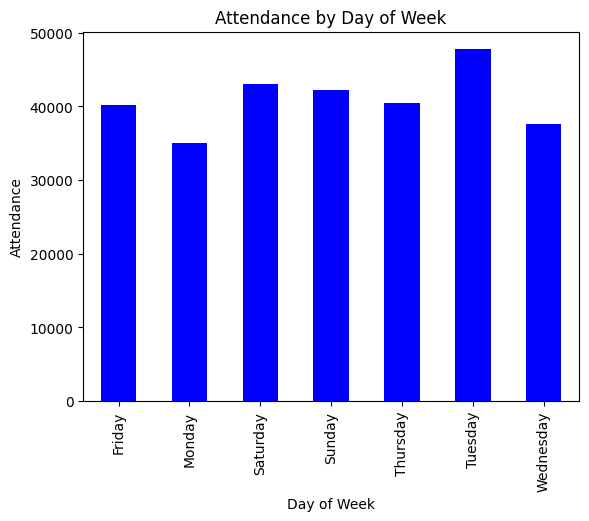

In [19]:
# Group by day_of_week and calculate the mean attendance
attendance_by_day = dodgers_df.groupby('day_of_week')['attend'].mean().reset_index()

# Create bar chart from DataFrame
attendance_by_day.plot(kind = 'bar', x = 'day_of_week', y = 'attend', color = 'blue', legend = False)
plt.xlabel('Day of Week')
plt.ylabel('Attendance')
plt.title('Attendance by Day of Week')
plt.show()

We can see that we have a roughly equal distribution of data points for each day of the week, with the top graph. The bottom graph shows overall attendance on those days. There isn't much difference between the days of the week on this chart.

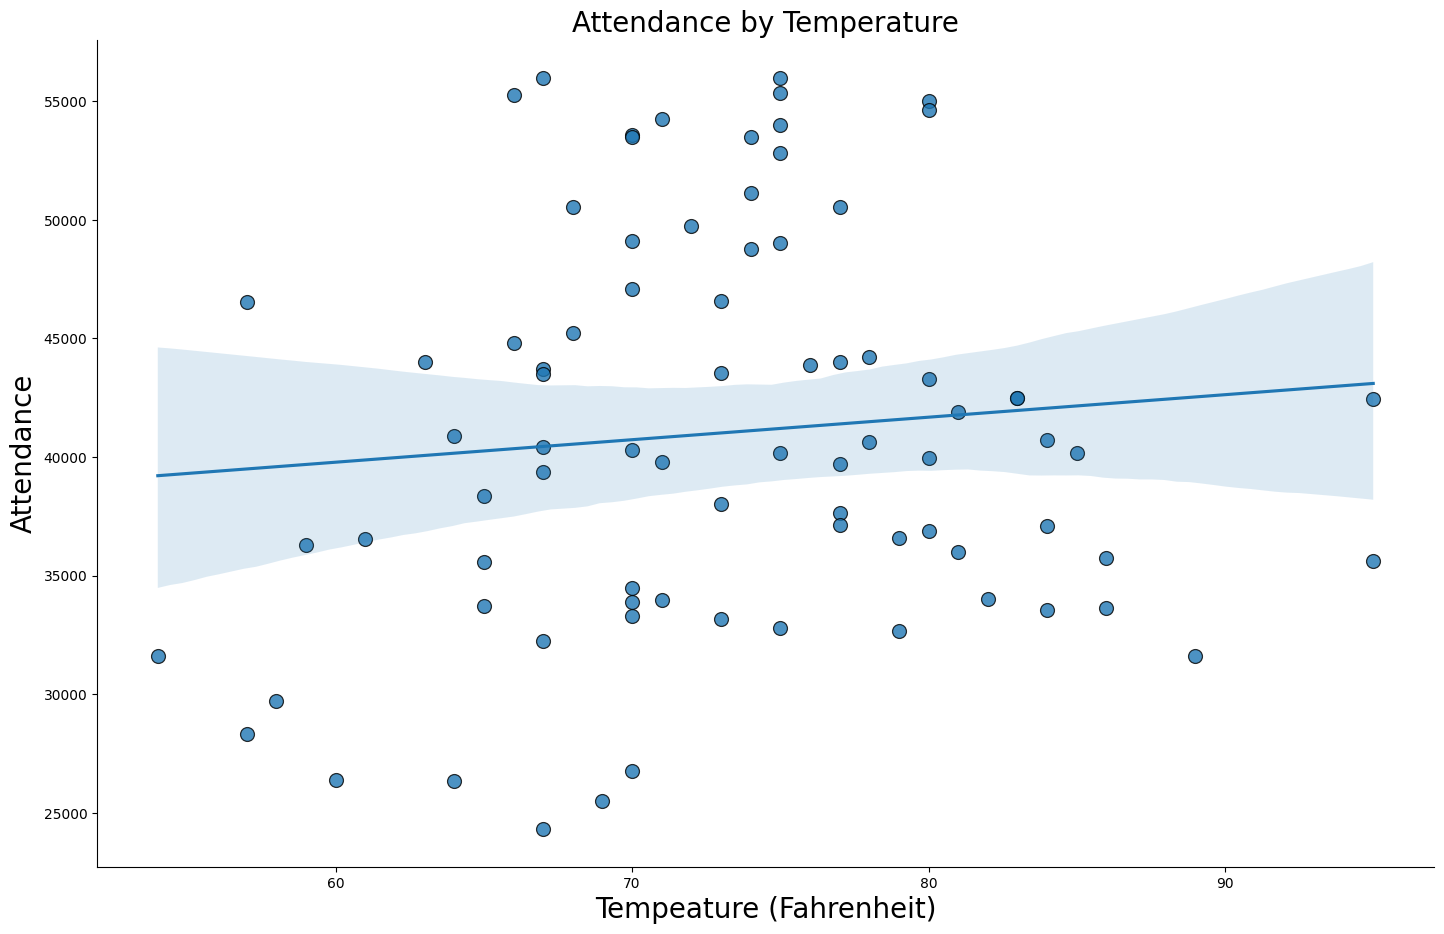

In [20]:
# Create a scatterplot with a line of best fit
gridobj = sns.lmplot(x = 'temp', y = 'attend', data = dodgers_df,
                     height = 9, aspect = 1.6, robust = True, palette = 'tab10',
                     scatter_kws = dict(s = 100, linewidths = .9, edgecolors = 'black'))

# Add a title
plt.title('Attendance by Temperature', fontsize = 20)
# Add x and y labels
plt.xlabel('Tempeature (Fahrenheit)', fontsize = 20)
plt.ylabel('Attendance', fontsize = 20)
# Show the plot
plt.show()

Based on this chart, a scatterplot with line of best fit, there is a slight positive correlation between temperature and attendance. This may not necessarily determine that temperature is the only factor impacting attendance, but it will be important to look at in modeling.

In [21]:
# Check the average stay of a Muddy Paws animal
print('The mean attendance is: ', dodgers_df.attend.mean())
# Check the median stay of a Muddy Paws animal
print('The median attendance is: ', dodgers_df.attend.median())
# Check the maximum attendance
print('The maximum attendance is: ', dodgers_df.attend.max())
# Check the minimum attendance
print('The minimum attendance is: ', dodgers_df.attend.min())

The mean attendance is:  41040.07407407407
The median attendance is:  40284.0
The maximum attendance is:  56000
The minimum attendance is:  24312


We can see that the attendance can go as low as 25,000 and as high as 56,000. That's a pretty big range, so it's possible there will be relationships that can be determined between the independent and dependant variables.

### Get Dummies for the Dodgers Dataframe

In [22]:
# Check the top of the dataframe
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,5,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,5,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,5,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,5,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,5,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [23]:
# Instatiate a list to contain the column names to which I want to avoid applying get_dummies
columns_to_exclude = ['attend', 'temp']

# Use the pd.get_dummies function to get dummy values for all columns not in the columns_to_exclude list and drop the columns for
# which dummies have been obtained

dummy_dodgers_df = pd.get_dummies(dodgers_df, columns = filter(
    lambda i: i not in columns_to_exclude,
    dodgers_df.columns)).drop(['month', 'day', 'day_of_week', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'
                              ], axis = 1)

In [24]:
# Allow for all columns to be displayed
pd.set_option('display.max_columns', None)

In [25]:
# Check the top of the new dummy dataframe
dummy_dodgers_df.head()

,attend,temp,month_5,month_6,month_7,month_8,month_9,month_10,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,56000,67,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False
1,29729,58,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False
2,28328,57,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False
3,31601,54,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,True,False
4,46549,57,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False


We can see that all the categorical variables have been split up based on their value and beneath there is either a 1 (for true) or a 0 (for false). This helps the machine when running models. 

### Split and Scale the Data

In [26]:
# Assign all the data minus length of stay to X
X = dummy_dodgers_df.drop(['attend'], axis = 1)
# Assign length_of_stay_days column to y
y = dummy_dodgers_df.attend

In [27]:
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [28]:
# Assign StandardScaler to scaler
scaler = StandardScaler()

In [29]:
# Scale the training data
train_scaled = scaler.fit_transform(X_train)

In [30]:
# Scale the test data
test_scaled = scaler.transform(X_test)

### Create a Linear Regression Model and Use it to Make Predictions

In [31]:
# Assign linear regression to the variable 'model'
model = LinearRegression()

In [32]:
# Fit the model to the training data
model.fit(train_scaled, y_train)

LinearRegression()

In [33]:
# Use the model to predict the test data
ypred = model.predict(test_scaled)

In [34]:
# Metrics to evaluate your model 
print('The R2 score is: ', r2_score(y_test, ypred))
print('The mean absolute error is: ', mean_absolute_error(y_test, ypred))
print('The mean squared error is: ', np.sqrt(mean_squared_error(y_test, ypred)))

The R2 score is:  -31.67543853428394
The mean absolute error is:  43796.4426740069
The mean squared error is:  52421.665228453734


This is a very bad model to say the least. It is not making accurate predictions per the R2 value. I will try a different model below.

### Create a Random Forest Regression Model and Use it to Make Predictions

In [35]:
# Create list of feature names
feature_names = X_train.columns
# Convert the NumPy array to a DataFrame with feature names
train_df = pd.DataFrame(train_scaled, columns = feature_names)

In [36]:
# Assign random forest regressor to rf
rf = RandomForestRegressor(n_estimators = 1000, random_state = 100)

In [37]:
# Use TransformedTargetRegressor with QuantileTransformer
ttr = TransformedTargetRegressor(
    regressor = rf,
    transformer = QuantileTransformer(output_distribution = 'normal', n_quantiles = 64)
)


# Fit the TransformedTargetRegressor
ttr.fit(train_df, y_train)

TransformedTargetRegressor(regressor=RandomForestRegressor(n_estimators=1000,
                                                           random_state=100),
                           transformer=QuantileTransformer(n_quantiles=64,
                                                           output_distribution='normal'))

In [38]:
# Create a test data frame with feature names
X_test_df = pd.DataFrame(X_test, columns = feature_names)
# Predict the values
yhat = ttr.predict(X_test_df)

In [39]:
print('R2 Score: ', r2_score(y_test, yhat))
print('Mean Absolute Error: ', mean_absolute_error(y_test, yhat))
print('Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, yhat)))

R2 Score:  -0.07095064174539645
Mean Absolute Error:  7792.524805044334
Mean Squared Error:  9490.406785114796


This is also a pretty bad model. Let's try some others.

### Perform a GridSearch

In [40]:
# Import the needed libraries
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgbm
import xgboost as xg

#generic function to fit model and return metrics for every algorithm
def boost_models(x):
    #transforming target variable through quantile transformer
    regr_trans = TransformedTargetRegressor(regressor = x, transformer = QuantileTransformer(output_distribution = 'normal', n_quantiles = 64))
    regr_trans.fit(train_scaled, y_train)
    yhat = regr_trans.predict(test_scaled)
    algoname= x.__class__.__name__
    return algoname, round(r2_score(y_test, yhat),3), round(mean_absolute_error(y_test, yhat),2), round(np.sqrt(mean_squared_error(y_test, yhat)),2)

algo = [GradientBoostingRegressor(), lgbm.LGBMRegressor(), xg.XGBRFRegressor(), RandomForestRegressor(), LinearRegression()]
score = []
for a in algo:
    score.append(boost_models(a))

#Collate all scores in a table
pd.DataFrame(score, columns=['Model', 'R2 Score', 'MAE', 'RMSE'])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

,Model,R2 Score,MAE,RMSE
0,GradientBoostingRegressor,0.057,7292.75,8903.82
1,LGBMRegressor,0.201,6706.65,8198.85
2,XGBRFRegressor,0.234,6131.94,8024.40
3,RandomForestRegressor,0.013,6724.40,9112.18
4,LinearRegression,-3.692,17638.24,19865.04


We have some models here that are actually working, though not with high accuracy. Let's try something else.

In [41]:
param_grid = {'n_estimators':[10000, 20000, 30000, 40000, 50000]}
                
grid = GridSearchCV(xg.XGBRFRegressor(), param_grid, refit = True, verbose = 3, n_jobs = -1) #
regr_trans = TransformedTargetRegressor(regressor = grid, transformer = QuantileTransformer(output_distribution = 'normal', n_quantiles = 64))

# fitting the model for grid search 
grid_result = regr_trans.fit(train_scaled, y_train)
best_params = grid_result.regressor_.best_params_
print(best_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_estimators': 50000}


In [42]:
#using best params to create and fit model
best_model = RandomForestRegressor(n_estimators = best_params['n_estimators'])
regr_trans = TransformedTargetRegressor(regressor = best_model, transformer = QuantileTransformer(output_distribution = 'normal', n_quantiles = 64))
regr_trans.fit(train_scaled, y_train)
yhat = regr_trans.predict(test_scaled)

#evaluate metrics
print('R2 Score: ', r2_score(y_test, yhat))
print('Mean Absolute Error: ', mean_absolute_error(y_test, yhat))
print('Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, yhat)))

R2 Score:  0.02998088210393779
Mean Absolute Error:  6772.486769382504
Mean Squared Error:  9032.131399177542


This is still not a good model at all. Below I'm going to adjust the data.

### Use a Classification Model instead of a Regression Model

In [43]:
# Read the dodgers-2022 csv file and assign it to a dataframe variable
dodgers_df = pd.read_csv('dodgers-2022.csv')

In [44]:
# Split the data in the attendance column into sections and change the labels to "low", "medium", and "high"
dodgers_df.attend = pd.qcut(dodgers_df.attend, 3, labels = ['low', 'medium', 'high'])

In [45]:
# Check the dataframe
dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,high,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,low,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,low,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,low,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,high,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [46]:
# Instatiate a list to contain the column names to which I want to avoid applying get_dummies
columns_to_exclude = ['temp', 'attend']

# Use the pd.get_dummies function to get dummy values for all columns not in the columns_to_exclude list and drop the columns for
# which dummies have been obtained

dummy_dodgers_df = pd.get_dummies(dodgers_df, columns = filter(
    lambda i: i not in columns_to_exclude,
    dodgers_df.columns)).drop(['month', 'day', 'day_of_week', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'
                              ], axis = 1)

In [47]:
# Check the dataframe
dummy_dodgers_df.head()

,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,opponent_Angels,opponent_Astros,opponent_Braves,opponent_Brewers,opponent_Cardinals,opponent_Cubs,opponent_Giants,opponent_Marlins,opponent_Mets,opponent_Nationals,opponent_Padres,opponent_Phillies,opponent_Pirates,opponent_Reds,opponent_Rockies,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,high,67,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,True,False,True,False
1,low,58,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False
2,low,57,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False
3,low,54,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,True,False,False,True,True,False
4,high,57,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,True,False,True,False,True,False


#### Split into train and test sets, then scale the data.

In [48]:
# Assign all the data minus length of stay to X
X = dummy_dodgers_df.drop(['attend'], axis = 1)
# Assign length_of_stay_days column to y
y = dummy_dodgers_df.attend

In [49]:
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [50]:
# Assign StandardScaler to scaler
scaler = StandardScaler()

In [51]:
# Scale the training data
train_scaled = scaler.fit_transform(X_train)

In [52]:
# Scale the test data
test_scaled = scaler.transform(X_test)

#### Try a random forest classifier. 

In [53]:
# Assign random forest classifier to rfc
rfc = RandomForestClassifier(random_state = 42)
# 
accuracies = cross_val_score(rfc, train_scaled, y_train, cv = 5)
rfc.fit(train_scaled, y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(test_scaled,y_test))

Train Score: 0.5961538461538461
Test Score: 0.6470588235294118


c:\Users\runek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


We have MUCH better accuracy here, at 59% for the training set and 64% for the test set. Below, let's check which features are most important in determining the prediction.

In [54]:
rfc.feature_importances_

array([9.87405989e-02, 1.22430599e-02, 4.95132977e-02, 1.54567911e-02,
       2.62597300e-02, 2.35357643e-02, 4.55996457e-03, 1.56909664e-02,
       9.24521774e-03, 8.48717246e-03, 7.27605393e-03, 1.11737845e-02,
       7.15388856e-03, 5.99396733e-03, 1.17659122e-02, 8.21800470e-03,
       5.71883780e-03, 6.62422590e-03, 9.11101889e-03, 6.04195038e-03,
       1.18990180e-02, 3.15849321e-03, 2.08827395e-02, 5.04226053e-03,
       1.12579486e-02, 6.29807749e-03, 4.49659465e-03, 1.05410968e-02,
       0.00000000e+00, 3.81744501e-03, 5.72437614e-04, 4.24422288e-03,
       3.67986234e-03, 1.06922779e-03, 6.59004639e-03, 9.83223390e-03,
       5.80487707e-03, 1.60757698e-02, 3.38875357e-05, 2.34721782e-02,
       4.60154389e-02, 1.16427117e-02, 1.58939783e-02, 2.11315887e-03,
       3.08654647e-02, 1.63212480e-02, 4.16402799e-03, 4.84795946e-03,
       4.14343906e-03, 9.63505204e-03, 2.67178336e-02, 7.09684831e-03,
       1.52576654e-02, 3.79253709e-03, 1.21874860e-02, 5.48302172e-03,
      

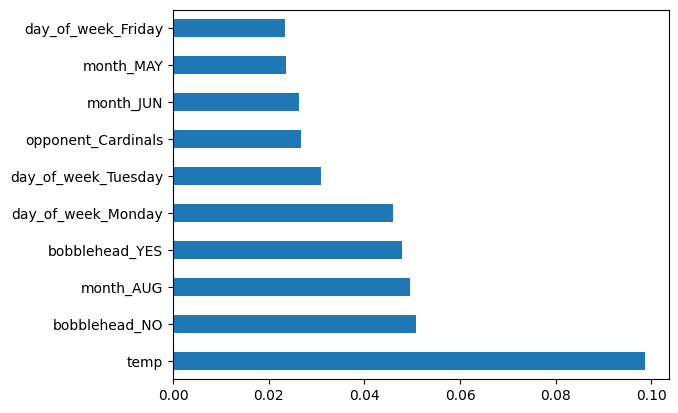

In [55]:
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Temperature is BY FAR the most important feature. This is what will determine my recommendation after checking one more iteration of this data.

#### Change the data and use a random forest classifier

In [56]:
# Read the dodgers-2022 csv file and assign it to a dataframe variable
dodgers_df = pd.read_csv('dodgers-2022.csv')

In [57]:
# Change the attendance column from continous to categorical
dodgers_df.attend = pd.qcut(dodgers_df.attend, 3, labels = ['low', 'medium', 'high'])
# Assign months to numbers instead of strings
d = {'APR':4, 'MAY':5, 'APR':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10}
dodgers_df.month = dodgers_df.month.map(d)

In [58]:
# Assign day_of_week to numbers instead of strings
d = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
dodgers_df.day_of_week = dodgers_df.day_of_week.map(d)

In [59]:
# Instatiate a list to contain the column names to which I want to avoid applying get_dummies
columns_to_exclude = ['temp', 'attend', 'month', 'day_of_week']

# Use the pd.get_dummies function to get dummy values for all columns not in the columns_to_exclude list and drop the columns for
# which dummies have been obtained

dummy_dodgers_df = pd.get_dummies(dodgers_df, columns = filter(
    lambda i: i not in columns_to_exclude,
    dodgers_df.columns)).drop(['day', 'opponent', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'
                              ], axis = 1)

In [60]:
# Assign all the data minus length of stay to X
X = dummy_dodgers_df.drop(['attend'], axis = 1)
# Assign length_of_stay_days column to y
y = dummy_dodgers_df.attend
# Assign all the data minus length of stay to X
X = dummy_dodgers_df.drop(['attend'], axis = 1)
# Assign length_of_stay_days column to y
y = dummy_dodgers_df.attend
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
# Assign StandardScaler to scaler
scaler = StandardScaler()
# Scale the training data
train_scaled = scaler.fit_transform(X_train)
# Scale the test data
test_scaled = scaler.transform(X_test)

In [61]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, train_scaled, y_train, cv=5)
rfc.fit(train_scaled, y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(test_scaled, y_test))

Train Score: 0.5153846153846154
Test Score: 0.6470588235294118


c:\Users\runek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


We have a sligthly lower accuracy here than in the iteration just above this, but it will still be useful in determining feature importance, because the dummy variables will be different. Month, day of week, and temperature are all not split into dummies.

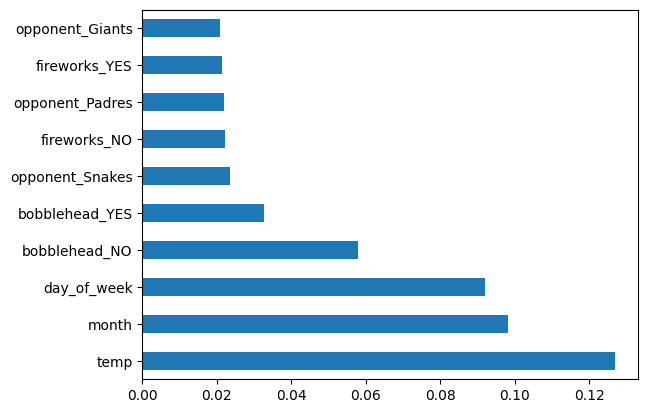

In [62]:
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.show()

As in the previous iteration, temperature is the most important determining factor. In this case it's followed by month and day of the week. Some other factors also came up, such as whether the opposing team is the Snakes, the Padres, or the Giants.

### Recomendations for Increasing Attendance

My number one recommendation would be to introduce temperature mitigation or control to the stadium. Perhaps some of those misters like they have at the zoo for hot days, or seats that won't be burning hot in the sun. 

Other recommendations would include to be mindful of the day of the week, and making sure bobbleheads are available for purchase as those seem to encourage attendance as well. Regular fireworks would also be a recommendation. 